In [1]:
#CIFAR-10 Classification using Artificial Neural Networks (ANN) and Convolutional Neural Neworks (CNN)


# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import ssl

In [2]:
# To avoid SSL certificate verification issues
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Reshape the labels from 2D to 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
# Class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


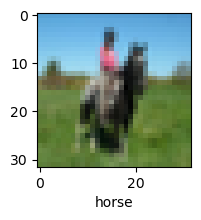

In [5]:
# Function to plot sample images
def plot_sample(x, y, index):
    plt.figure(figsize=(6,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

# Plot a sample image
plot_sample(x_train, y_train, 1854)

In [6]:
# Normalize the data (scaling pixel values to the range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [7]:
# Build a simple ANN model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(30, activation='relu'),   # First hidden layer with ReLU
    layers.Dense(15, activation='relu'),   # Second hidden layer with ReLU
    layers.Dense(10, activation='sigmoid') # Output layer with Sigmoid activation
])

# Compile the ANN model
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the ANN model
ann.fit(x_train, y_train, epochs=10)



Epoch 1/10


1563/1563 [==============================] - 24s 11ms/step - loss: 2.0675 - accuracy: 0.2187
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.9622 - accuracy: 0.2566
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9417 - accuracy: 0.2576
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.9311 - accuracy: 0.2573
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.9243 - accuracy: 0.2574
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9204 - accuracy: 0.2579
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9179 - accuracy: 0.2577
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9128 - accuracy: 0.2581
Epoch 9/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.9127 - accuracy: 0.2608
Epoch 10/10
1563/1563 [==============================] - 13s 

In [8]:
# Evaluate the ANN model on the test set
ann.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.8988 - accuracy: 0.2678


[1.8987525701522827, 0.2678000032901764]

In [9]:
# Make predictions on the test set
y_prediction = ann.predict(x_test)
y_pred = [np.argmax(i) for i in y_prediction]

# Print classification report for ANN model
print('Classification report (ANN): \n', classification_report(y_test, y_pred))

313/313 [==============================] - 3s 7ms/step
Classification report (ANN): 
               precision    recall  f1-score   support

           0       0.33      0.57      0.42      1000
           1       0.29      0.24      0.26      1000
           2       0.19      0.01      0.02      1000
           3       0.16      0.04      0.06      1000
           4       0.14      0.02      0.04      1000
           5       0.18      0.38      0.24      1000
           6       0.25      0.62      0.35      1000
           7       0.20      0.07      0.11      1000
           8       0.36      0.27      0.31      1000
           9       0.38      0.44      0.41      1000

    accuracy                           0.27     10000
   macro avg       0.25      0.27      0.22     10000
weighted avg       0.25      0.27      0.22     10000



In [10]:
# Confusion matrix for ANN model
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
print('Confusion Matrix (ANN):\n', cm)

Confusion Matrix (ANN):
 tf.Tensor(
[[573  38   6  10   4 113  35  17 148  56]
 [ 73 240   1  20   0  92  73  34 101 366]
 [184  29   9  37  26 281 357  42  16  19]
 [ 90  81   7  39  23 374 275  56  21  34]
 [ 86  29   1  25  21 273 506  27  19  13]
 [119  56  10  29  26 383 293  43  25  16]
 [ 20  48   1  45  19 203 622  24   0  18]
 [ 93  72   5  28  25 337 282  74  35  49]
 [413  50   7   1   1  68  13  23 274 150]
 [ 84 186   1  16   4  46  57  32 131 443]], shape=(10, 10), dtype=int32)


In [11]:
# Build a CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),   # First hidden layer with ReLU
    layers.Dense(100, activation='relu'),   # Second hidden layer with ReLU
    layers.Dense(10, activation='softmax')  # Output layer with Softmax activation for multi-class classification
])

# Compile the CNN model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the CNN model
cnn.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 96s 55ms/step - loss: 1.4314 - accuracy: 0.4803
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0831 - accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9214 - accuracy: 0.6771
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8029 - accuracy: 0.7187
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7168 - accuracy: 0.7494
Epoch 6/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6317 - accuracy: 0.7795
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.5553 - accuracy: 0.8039
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.4905 - accuracy: 0.8261
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.4237 - accuracy: 0.8508
Epoch 10/10
1563/1563 [==============================] - 36s 2

In [12]:
# Evaluate the CNN model on the test set
cnn.evaluate(x_test, y_test)

# Make predictions on the test set
y_pred = cnn.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 9ms/step


In [13]:
# Print classification report for CNN model
print('Classification report (CNN): \n', classification_report(y_test, y_classes))

Classification report (CNN): 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.79      0.84      0.82      1000
           2       0.61      0.59      0.60      1000
           3       0.49      0.52      0.50      1000
           4       0.67      0.61      0.64      1000
           5       0.59      0.60      0.60      1000
           6       0.82      0.74      0.77      1000
           7       0.78      0.72      0.75      1000
           8       0.82      0.77      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

